###Defining the question

**a) Specifying the question**<br>
Working as a datascientist for Hass Consulting Company, a real estate company with over 25 years of experience. You are tasked to study the factors affecting housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.  

b) Metrics of success <br>

Our analysis will be considered a success if we are able to identify the best regression model with the least RMSE and highest accuracy.

c) Understanding the context.<br>
Hass Consulting Company which is a real estate leader with over 25 years of experience. Real estate is an industry that highly utilizes data science. It is esssential for the industry to keep data over periods of time so as to be able to predict prices in the market

**d) Experimental design**<br>


* Defining the Question
* Data Preparation
* Data Appropriateness
* Data Cleaning
* Univariate Analysis
* Bivariate Analysis
* Multivariate Analysis
* Regression Analysis
* Reccommendation
* Challenging the solution




### Data Preparation

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading our datasets
df = pd.read_csv("/content/Independent Project Week 7 - house_data.csv")

In [ ]:
#preiewing top of our dataset
df.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [ ]:
#previewing bottom of our dataset
df.tail()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

In [ ]:
#checking shape of our dataset
df.shape

(21613, 20)

In [ ]:
#getting information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

###Data appropriateness

In [26]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

The data used for analysis contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018 and is relevant for analysis.

###Data Cleaning

In [ ]:
#checking columns naming system
df.columns

#seems okay

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [32]:
#dropping highly not needed id column
df.drop(['id'],axis=1,inplace = True)

In [41]:
#checking columns datatypes
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

All our columns are numerical columns

In [33]:
#checking for missing values
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [34]:
#checking for duplicates
df.duplicated().sum()

2

In [35]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [36]:
#confirming duplicates
df.duplicated().sum()

0

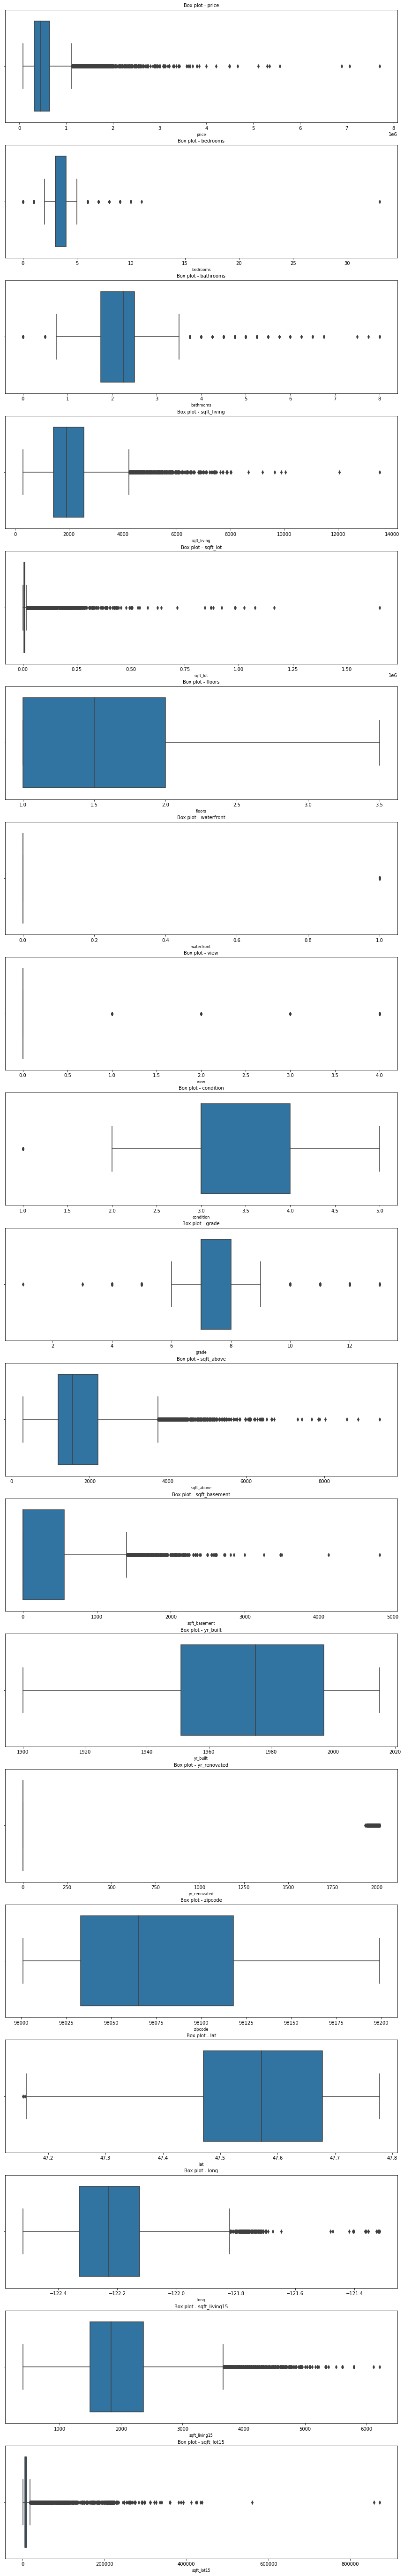

In [37]:
#checking for outliers by plotting boxplots
fig, ax = plt.subplots(len(df.columns), figsize= (15,100))

for i, col_val in enumerate(df.columns):
  sns.boxplot(df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [38]:
#Checking for number of outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 -Q1
out = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).sum()
out

price            1159
bedrooms          546
bathrooms         571
sqft_living       572
sqft_lot         2424
floors              0
waterfront        163
view             2123
condition          30
grade            1911
sqft_above        611
sqft_basement     496
yr_built            0
yr_renovated      913
zipcode             0
lat                 2
long              256
sqft_living15     544
sqft_lot15       2194
dtype: int64

### Univariate anaysis

In [40]:
#gettting the summary statistics
df.describe()

price      bedrooms  ...  sqft_living15     sqft_lot15
count  2.160800e+04  21608.000000  ...   21608.000000   21608.000000
mean   5.401924e+05      3.370927  ...    1986.583164   12770.108340
std    3.673996e+05      0.930103  ...     685.421474   27307.006892
min    7.500000e+04      0.000000  ...     399.000000     651.000000
25%    3.218375e+05      3.000000  ...    1490.000000    5100.000000
50%    4.500000e+05      3.000000  ...    1840.000000    7620.000000
75%    6.450000e+05      4.000000  ...    2360.000000   10083.250000
max    7.700000e+06     33.000000  ...    6210.000000  871200.000000

[8 rows x 19 columns]

In [42]:
#gettinng the various deescriptive statistics of the columns
for i in df.columns:
  print(i)
  print(f'mean:  {df[i].mean()}')
  print(f'median:  {df[i].sort_values(ascending=False).median()}')
  print(f'mode:  {df[i].mode()}')
  print(f'skewness:  {df[i].skew()}')
  print(f'The Standard Deviation: {df[i].std()}')
  print(f'The Variance: {df[i].var()}')
  print(f'Kurtosis:  {df[i].kurt()}, \n')

price
mean:  540192.4078119216
median:  450000.0
mode:  0    350000.0
1    450000.0
dtype: float64
skewness:  4.021354631513139
The Standard Deviation: 367399.6343396712
The Variance: 134982491312.92407
Kurtosis:  34.51538421151693, 

bedrooms
mean:  3.370927434283599
median:  3.0
mode:  0    3
dtype: int64
skewness:  1.9743628437076959
The Standard Deviation: 0.9301025674900445
The Variance: 0.8650907860515727
Kurtosis:  49.06562128233084, 

bathrooms
mean:  2.1147375971862274
median:  2.25
mode:  0    2.5
dtype: float64
skewness:  0.5111461154271603
The Standard Deviation: 0.7702384023013656
The Variance: 0.5932671963797603
Kurtosis:  1.2792645615484326, 

sqft_living
mean:  2079.958950388745
median:  1910.0
mode:  0    1300
dtype: int64
skewness:  1.4714674846314069
The Standard Deviation: 918.5058048414882
The Variance: 843652.9135275099
Kurtosis:  5.242209340747705, 

sqft_lot
mean:  15109.616299518697
median:  7620.0
mode:  0    5000
dtype: int64
skewness:  13.058690623882546
The

In [44]:
#getting range of the price distribution
maximum_value = df.price.max()
minimum_value = df.price.min()
range = maximum_value - minimum_value

print(range)

7625000.0


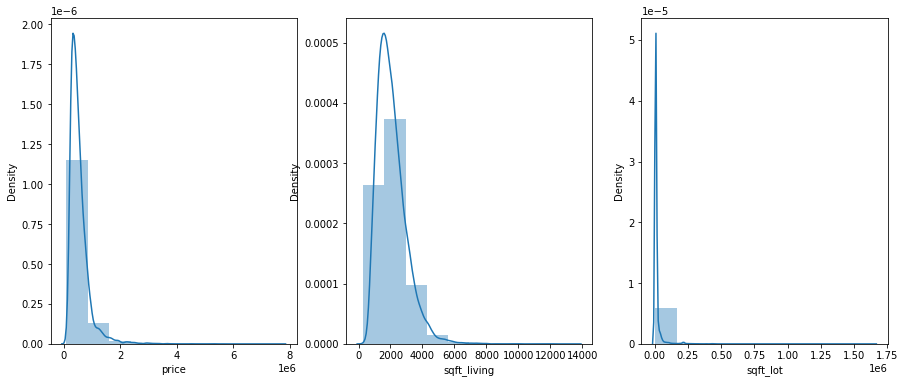

In [46]:
#plotting distribution of our major columns esp price
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize= (15,6))

sns.distplot(df.price, ax=ax1, bins= 10)
sns.distplot(df.sqft_living, ax=ax2, bins= 10)
sns.distplot(df.sqft_lot, ax=ax3, bins= 10)

In [45]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

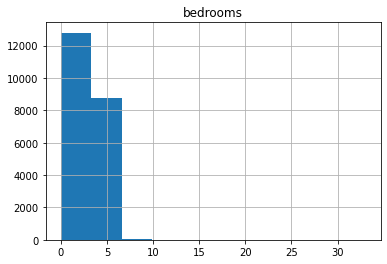

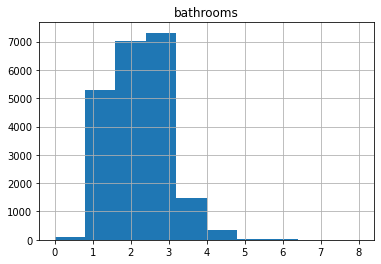

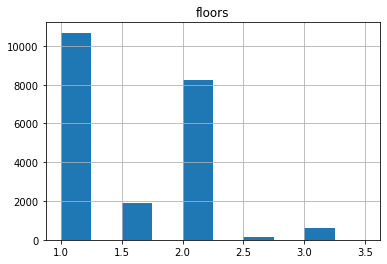

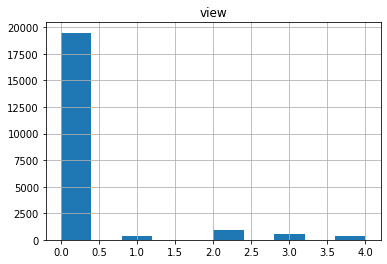

In [49]:
#plotting histograms
cols = df[['bedrooms','bathrooms','floors','view']]
for i in cols:
  df.hist(i)

Text(0.5, 1.0, 'Waterfront availability distribution')

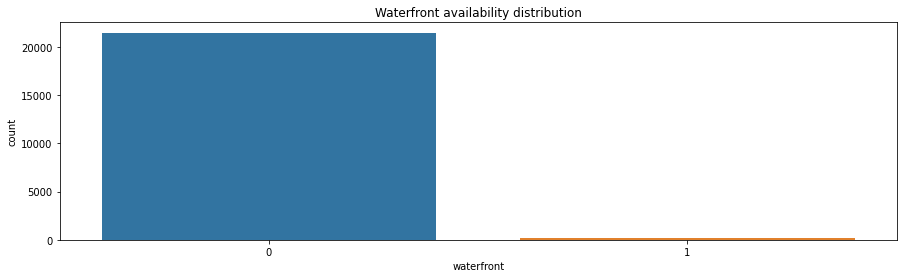

In [51]:
#categorical encoded column distribution
plt.figure(figsize=(15, 4))
sns.countplot(df['waterfront'], order = df['waterfront'].value_counts().index);
plt.title('Waterfront availability distribution')

###Bivariate Analysis

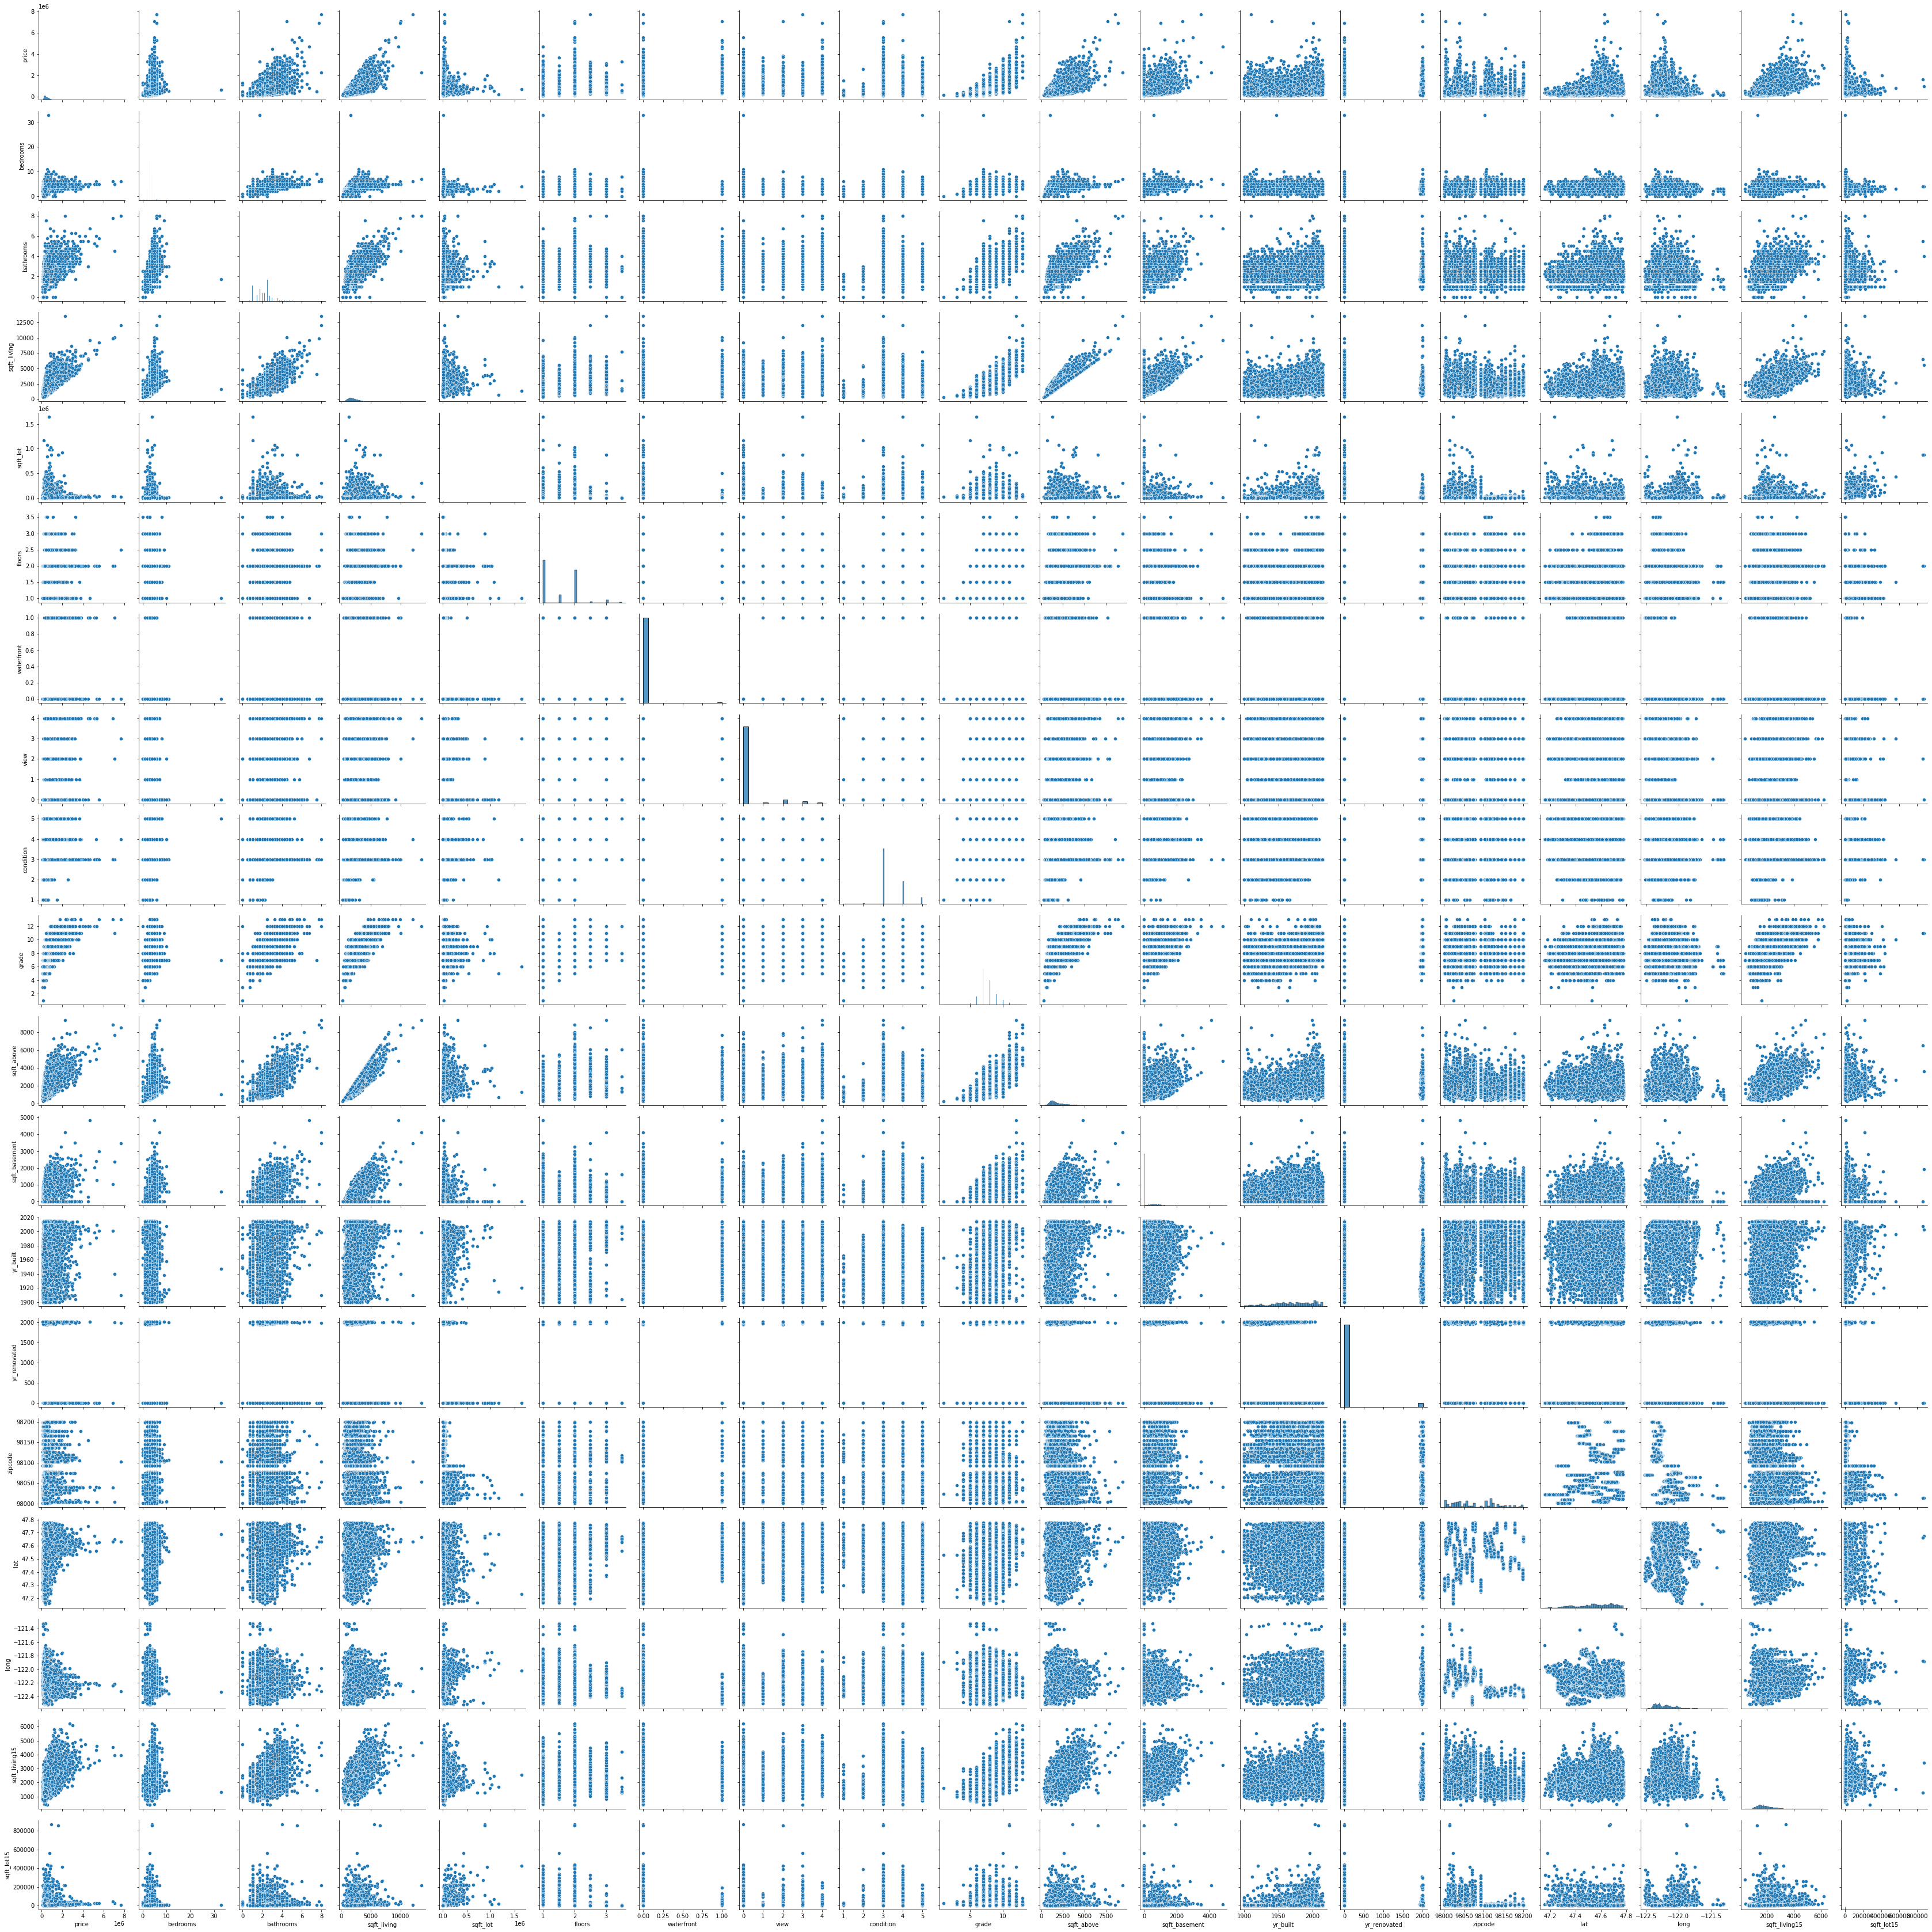

In [53]:
# Ploting scatterplots of all columns to show correlation
sns.pairplot(df)
plt.show()

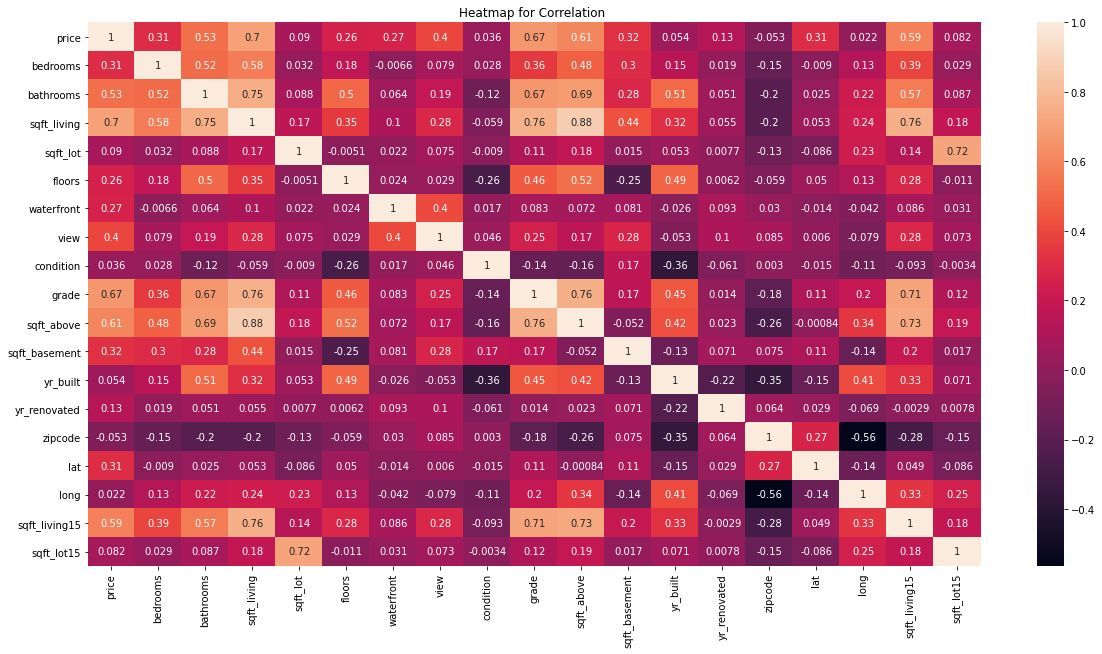

In [58]:
#plotting heatmap
cor = df.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)
plt.title('Heatmap for Correlation ')
plt.show()

###Multivariate analysis

In [54]:
X = df.drop(['price'], 1)
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy0.013882461823229986


###Modelling

In [59]:
X = df.drop(['price'], 1)
y = df['price']

###Multicollinearity

In [66]:
df.describe()

price      bedrooms  ...  sqft_living15     sqft_lot15
count  2.160800e+04  21608.000000  ...   21608.000000   21608.000000
mean   5.401924e+05      3.370927  ...    1986.583164   12770.108340
std    3.673996e+05      0.930103  ...     685.421474   27307.006892
min    7.500000e+04      0.000000  ...     399.000000     651.000000
25%    3.218375e+05      3.000000  ...    1490.000000    5100.000000
50%    4.500000e+05      3.000000  ...    1840.000000    7620.000000
75%    6.450000e+05      4.000000  ...    2360.000000   10083.250000
max    7.700000e+06     33.000000  ...    6210.000000  871200.000000

[8 rows x 19 columns]

In [60]:
corr=X.corr()

In [61]:
#Checking the VIF
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.652031  -0.461426  ...       0.025352    0.085414
bathrooms     -0.461426   3.351350  ...       0.092103    0.071422
sqft_living   -1.084569  -1.852544  ...      -0.970823   -0.088666
sqft_lot       0.049328  -0.024052  ...       0.163908   -1.459284
floors         0.049899  -0.675550  ...       0.272344    0.072693
waterfront     0.063074   0.010093  ...       0.054387   -0.018479
view           0.114430  -0.042357  ...      -0.325319   -0.007474
condition     -0.050617  -0.137281  ...       0.075906   -0.028238
grade          0.306791  -0.268260  ...      -0.912175    0.071929
sqft_above     0.102826   0.397610  ...      -0.659680   -0.095830
sqft_basement  0.038277  -0.186685  ...      -0.003288   -0.016839
yr_built       0.134482  -0.935767  ...       0.077534   -0.033722
yr_renovated   0.045798  -0.260444  ...       0.099251   -0.022193
zipcode        0.080165   0.041786  ...       0.210215   -0.015487
lat            0.050859  -0.041043  ...      -0.094694    0.036648
long           0.017531   0.053840  ...      -0.354365   -0.160883
sqft_living15  0.025352   0.092103  ...       2.979592   -0.125604
sqft_lot15     0.085414   0.071422  ...      -0.125604    2.135627

[18 rows x 18 columns]

There is no Variance Inflation factor that ismore than 5 to show high collinearity. We will therefore not drop any of the columns from our model

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df
#To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = regressor.predict(X_test)

In [65]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 124447.90142583508
Mean Squared Error: 37944546667.3555
Root Mean Squared Error: 194793.60017042526


In [68]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

3954.26734388456

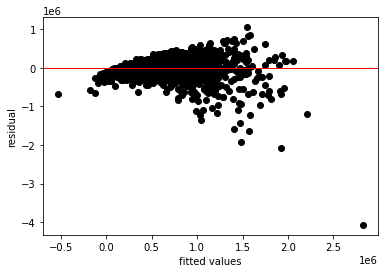

In [69]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [72]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)


# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


###Quantile Regression

In [122]:
# from sklearn.linear_model import LinearRegression
# x = df.drop(['price'], 1)
# y = df[['price']]


# model1 = LinearRegression(fit_intercept = True, normalize = False)
# model1.fit(x, y)

# y_pred1 = model1.predict(x)

# # print("Mean squared error: {0:.2f}".format(np.mean((y_pred1 - y) ** 2)))
# # print('Variance score: {0:.2f}'.format(model1.score(x, y)))


In [121]:
# # Plotting the regression
# plt.figure(2)
# plt.scatter(x, y,  color='black')
# plt.plot(x, y_pred1, color='blue',
#          linewidth=3)

# plt.xticks(())
# plt.yticks(())
# plt.xlabel("x")
# plt.ylabel("y and predicted y")
# plt.title("Linear regression")

In [120]:
# X = df.drop(['price'], 1)
# y = df[['price']]

# import statsmodels.formula.api as smf
# mod = smf.quantreg(, df)
# quantiles = np.arange(0.1,1,0.1) 
# models = []
# params = []

# # We build models for each quantile in our list quantiles inside a for loop
# # As we build these models we also store the model parameters in a list called params. 
# for qt in quantiles: 
# 	res = mod.fit(q = qt )
# 	models.append(res)
# 	params.append([qt, res.params['Intercept'], res.params['white'], res.params['totchr'], res.params['age'], res.params['female']]
#                + [res.conf_int().loc['white'].tolist(), res.conf_int().loc['totchr'].tolist(), res.conf_int().loc['age'].tolist(), res.conf_int().loc['female'].tolist()])

# # Lastly we make a dataframe of the same name, so we we can view our different models.
# params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x1_coef', 'x2_coef', 'x3_coef', 'x4_coef', 
#                                                 'cf_lower_bound1', 'cf_lower_bound2', 'cf_lower_bound3', 'cf_lower_bound4'])
# params

###Ridge Regression

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [100]:
X = df.drop(['price'], 1)
y = df[['price']]

In [101]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

# The output  value of 40519386486.31279 will be our indicator to determine if the regularized ridge regression model is superior or not.

40519386486.31279


In [102]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [104]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 24}
abs(search.best_score_) 

41017101081.942726

In [105]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=24)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

112684517009.391


In [106]:
# The 112684517009.391 is higher than the 41017101081.942726. 
# In addition, these results indicate that there is a huge difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'price': array([-3.57755672e+04,  4.10887636e+04,  1.10499903e+02,  1.28128514e-01,
         6.76610934e+03,  5.82598138e+05,  5.30370261e+04,  2.64505048e+04,
         9.60040674e+04,  7.08082572e+01,  3.96916461e+01, -2.62210329e+03,
         2.00361111e+01, -5.82674162e+02,  6.02893856e+05, -2.14739935e+05,
         2.16765515e+01, -3.82348353e-01])}

###Lasso Regression

In [73]:
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes
#
X = df.drop(['price'], 1)
y = df[['price']]

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [74]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6998035713813898
lasso MSE: 40519386528.39081
lasso coef: [-33273.00440197  31640.8475282  259508.82973164   5304.35712285
   3652.75160569  50408.62565933  40634.43532435  17212.01865124
 112851.20788461 -83825.88208458 -58573.40740486 -77011.34224167
   8043.91639671 -31173.82941938  83544.50334251 -30238.64811199
  14851.19704761 -10437.7585076 ]


In [80]:
# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_lda = lda.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.7032679215772549
linear score: 0.7032623392240047
lasso MSE: 38807112220.25854
linear MSE: 38807842289.65375
lasso best estimator coef: [ 1.41451000e+05 -5.10098971e+04 -9.07235088e+03  1.33380940e+03
  2.38398050e+03  2.27459448e+03 -8.76717913e+02  8.45244342e+02
  1.61956275e+02  6.89778581e+02 -1.99197610e+03  1.17733415e+03
  1.94309674e+03 -9.14597155e+02 -1.01372345e+02 -3.36481540e+03
 -1.96944782e+03]
linear coef: [[ 1.41456286e+05 -5.10283846e+04 -9.09408951e+03  1.35643516e+03
   2.40636033e+03  2.29818109e+03 -9.00386669e+02  8.68703299e+02
   1.85728133e+02  7.13954589e+02 -2.01617152e+03  1.20062247e+03
   1.96736513e+03 -9.39146931e+02 -1.25133592e+02 -3.38817433e+03
  -1.99700607e+03]]


In [113]:

# coefsLasso = [] 

# # Building Lasso for 200 values of alpha and write the coefficients into array
# # 
# alphasLasso = np.arange (0, 20, 0.1) 
# for i in range(200):
#   lasso = linear_model.Lasso(alpha=alphasLasso[i])
#   lasso.fit(X_train, y_train)
#   coefsLasso.append(lasso.coef_) 

# # Building Lasso coefficient plots
# # 
# plt.figure(figsize = (16,7))

# plt.subplot(121)
# plt.plot(alphasLasso, coefsLasso)
# plt.title('Lasso coefficients')
# plt.xlabel('alpha')
# plt.ylabel('coefs')

# plt.show()


###Elastic Net Regression

In [91]:
#importing libraries for elastic net regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [84]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

# This mean standard error score of 1.05 is our benchmark for determining 
# if the elastic net model will be better or worst. 

40519386486.31284


In [89]:
X = df.drop(['price'], 1)
y = df[['price']]

# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bedrooms': array([-33274.17690932,  31647.4113288 ,  81856.51787747,   5307.58987256,
          3653.0079568 ,  50409.37914932,  40634.36395961,  17213.11645732,
        112848.5917847 ,  76341.98392093,  27029.84322865, -77013.22739332,
          8044.65356946, -31176.35649275,  83545.90310699, -30241.16032896,
         14857.23006167, -10440.54751114])}

In [92]:
#elastic net regression requires normalised data hence below
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [116]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

41017101081.942726

In [119]:
# # Below are the coefficients
# # 
# coef_dict_baseline = {}
# for coef, feat in zip(elastic.coef_,X.columns):
#     coef_dict_baseline[feat] = coef
# coef_dict_baseline

###Reccommendation and challenging the solution

Our Multilinear regression produced an RMSE that is less than 10% the targeted variable. However its accuracy score was not acceptable. Thus leaning towards our Lasso regression model that had the least RMSE.